In [2]:
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
file_path = r"C:\Users\Kiran\Documents\jupyter notebook\IRIS.csv"
dfr = pd.read_csv(file_path)
dfr

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
print("Dataframe Shape:", dfr.shape)

Dataframe Shape: (150, 5)


In [5]:
print("Species Count:\n", dfr.groupby('species').size())

Species Count:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
print("Descriptive Statistics:\n", dfr.describe())

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
dfr.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
dfr.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [10]:
X = dfr.drop('species', axis=1)
Y = dfr['species']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)
predictions = svm_classifier.predict(X_validation)
print("Accuracy:", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(Y_validation, predictions))
print("\nClassification Report:\n", classification_report(Y_validation, predictions))

Accuracy: 0.8666666666666667

Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [11]:
dfr.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [12]:
species_summary = dfr.groupby('species').describe()
species_summary

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [13]:
dfr.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

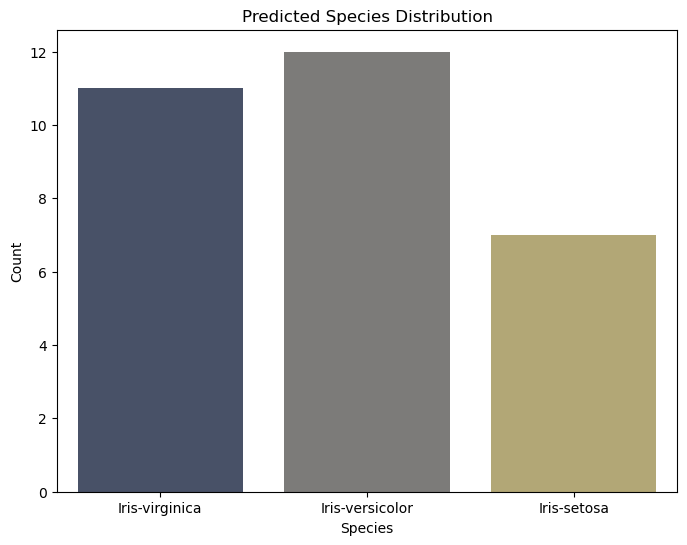

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
predictions_series = pd.Series(predictions, name="Predicted Species")
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions_series, palette="cividis")
plt.title("Predicted Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


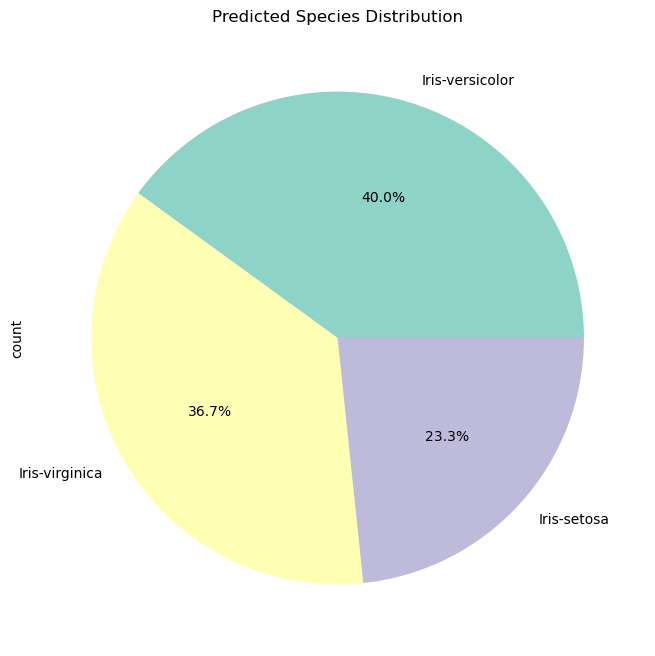

In [31]:
plt.figure(figsize=(8, 8))
predictions_series.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Predicted Species Distribution")
plt.show()
